In [3]:
from sklearn.cluster import AgglomerativeClustering,KMeans

In [4]:
from sklearn.preprocessing import scale, MinMaxScaler

In [5]:
import pandas as pd
import numpy as np

In [4]:
action = pd.read_csv('action_list_data.csv')

In [5]:
action.head()

,location_id,date,Business config,[object Object],analytics-action,analytics-menu,analytics-summary,auto-create-breaks,auto-scheduling-menu,availabilities-filter,...,shift-action,shift-details-panel,shift-filter,shift-summary,splash-screen,timeclock,timepunch-details,tips,top-nav,AOS
0,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0
2,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,14.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0
4,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0


In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [7]:
x = action.iloc[:,2:-2]

删除错误列

In [8]:
x = x.drop('[object Object]', axis=1)

In [9]:
x

,Business config,analytics-action,analytics-menu,analytics-summary,auto-create-breaks,auto-scheduling-menu,availabilities-filter,availability-publishing,business-config,calendar-view-navigation,...,schedule-menu,schedule-view-options,shift-action,shift-details-panel,shift-filter,shift-summary,splash-screen,timeclock,timepunch-details,tips
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,22.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,12.0,14.0,0.0,0.0,0.0,1.0,14.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,6.0,...,0.0,0.0,16.0,3.0,0.0,0.0,1.0,0.0,14.0,0.0
2212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
2213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
2214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0


- 归一化

In [10]:
min_max_scaler = MinMaxScaler()

In [11]:
x_norm = min_max_scaler.fit_transform(x)

#### kmeans 跑一遍原始数据集

In [12]:
kmeans.fit(x_norm)

KMeans(n_clusters=2, random_state=0)

In [13]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
labels = kmeans.labels_

In [58]:
# 因变量y
if_aos = action.iloc[:,-1]

计算纯度purity
- 与aos分类标签方向一致的1310/2216，不够好

In [16]:
abs(if_aos - labels).sum()

904

#### 用层次聚类法

In [17]:
hierarchical = AgglomerativeClustering()

In [18]:
hierarchical.fit(x_norm)

AgglomerativeClustering()

In [19]:
hierarchical.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
labels_hierarchical = hierarchical.labels_


计算纯度purity
- 与aos标签一致的1338/2216，不够好

In [21]:
abs(labels_hierarchical-if_aos).sum()

886

In [22]:
2216-878

1338

#### 检查多重共线性

In [23]:
x_cor_matrix = x.corr()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

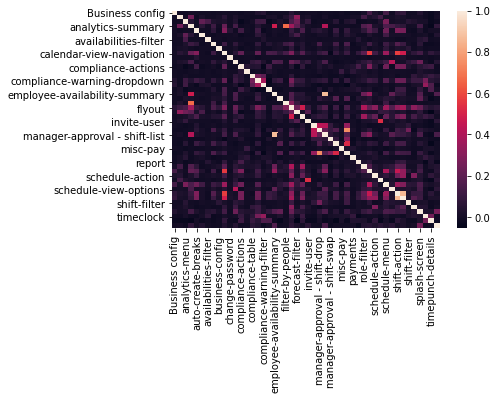

In [25]:
sns.heatmap(x_cor_matrix)

* 去掉相关性高的列再归一化

In [26]:
x_dropped = x.drop(['shift-details-panel'],axis=1)

In [28]:
x_dropped_norm = min_max_scaler.fit_transform(x_dropped)

- 再试一下聚类

In [29]:
labels3 = kmeans.fit(x_dropped_norm).labels_

In [30]:
abs(labels3-if_aos).sum()

912

In [31]:
2216-912

1304

计算纯度

In [32]:
1304/2216

0.5884476534296029

~~实在是不好用~~

- 尝试去掉总统计次数小于一定值的列

In [33]:
x_dropped.sum().mean()

2431.340425531915

In [34]:
x_copy = x_dropped.copy()

In [35]:
sum_list = x_dropped.sum()

In [36]:
sum_list.index

Index(['Business config', 'analytics-action', 'analytics-menu',
       'analytics-summary', 'auto-create-breaks', 'auto-scheduling-menu',
       'availabilities-filter', 'availability-publishing', 'business-config',
       'calendar-view-navigation', 'change-password', 'change-visibility',
       'compliance-actions', 'compliance-pay', 'compliance-table',
       'compliance-warning-dropdown', 'compliance-warning-filter',
       'conversations', 'employee-availability-summary', 'employee-details',
       'filter-by-people', 'flyout', 'forecast-filter', 'growl-notification',
       'invite-user', 'manager-approval', 'manager-approval - shift-drop',
       'manager-approval - shift-list', 'manager-approval - shift-swap',
       'manager-approval - unavailability', 'misc-pay', 'notification-panel',
       'payments', 'report', 'role-filter', 'schedule', 'schedule-action',
       'schedule-config', 'schedule-menu', 'schedule-view-options',
       'shift-action', 'shift-filter', 'shift-summa

In [37]:
for i in range(0,len(sum_list)):
    if sum_list[i] <= 500:
        x_copy = x_copy.drop([sum_list.index[i]], axis=1)

In [38]:
x_copy.columns

Index(['analytics-summary', 'auto-create-breaks', 'availability-publishing',
       'calendar-view-navigation', 'compliance-actions',
       'compliance-warning-dropdown', 'flyout',
       'manager-approval - shift-drop', 'manager-approval - unavailability',
       'notification-panel', 'role-filter', 'schedule', 'schedule-action',
       'schedule-menu', 'shift-action', 'splash-screen', 'timepunch-details'],
      dtype='object')

In [39]:
x_copy_norm = min_max_scaler.fit_transform(x_copy)

In [40]:
labels4 = kmeans.fit(x_copy_norm).labels_

In [41]:
abs(labels4-if_aos).sum()

909

因为只是去掉了矩阵稀疏的部分而没有真正地做特征变换（也不太方便做特征变换，因为我们还需要保留每个feature的现实含义）


理论上确实不会有很好的改进效果，尝试换一个思路

---

### 使用分类器，试图找出最大影响特征，用于反向说明aos的应用对action的影响

**x使用的是未进行特征选择与归一化的数据集**
- 不需要归一化
- 很多分类器有正则化手段，比如log默认使用L2，所以不事先进行feature筛选

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [43]:
log = LogisticRegression(random_state=0,max_iter=10000)

In [44]:
log_score = cross_val_score(log, x_dropped, if_aos, cv=10)
print("logistic accuracy: %0.2f (+/- %0.2f)" % (log_score.mean(), log_score.std() * 2))

logistic accuracy: 0.73 (+/- 0.07)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [46]:
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
tree_scores = cross_val_score(tree, x_dropped, if_aos, cv=10)
print("tree accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

tree accuracy: 0.67 (+/- 0.09)


In [47]:
rf = RandomForestClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
rf_scores = cross_val_score(rf, x_dropped, if_aos,cv=10)
print("rf accuracy: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))

rf accuracy: 0.73 (+/- 0.08)


In [48]:
et = ExtraTreesClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
et_scores = cross_val_score(et, x_dropped, if_aos, cv=10)
print("et accuracy: %0.2f (+/- %0.2f)" % (et_scores.mean(), et_scores.std() * 2))

et accuracy: 0.74 (+/- 0.07)


In [49]:
from xgboost import XGBClassifier
num_round = 100
xgbc =XGBClassifier(max_depth=2, learning_rate=1, n_estimators=num_round, #弱分类树太少的话取不到更多的特征重要性
         objective='binary:logistic')

In [50]:
xgbc_scores = cross_val_score(xgbc, x_dropped.values, if_aos, cv=10)

In [51]:
print("xgbc accuracy: %0.2f (+/- %0.2f)" % (xgbc_scores.mean(), xgbc_scores.std() * 2))

xgbc accuracy: 0.74 (+/- 0.08)


### 导出feature importance 并画图

#### 1.randomforest

In [52]:
rf_fit = rf.fit(x_dropped, if_aos)

In [53]:
fi = rf_fit.feature_importances_

In [54]:
fi = pd.Series(fi,index=x_dropped.columns)

In [55]:
fi.sort_values(ascending=False)

timepunch-details                    0.168841
shift-action                         0.110372
compliance-warning-dropdown          0.081008
calendar-view-navigation             0.073091
compliance-warning-filter            0.060347
flyout                               0.057367
schedule                             0.046941
notification-panel                   0.042645
compliance-actions                   0.041894
analytics-menu                       0.028087
timeclock                            0.026370
schedule-menu                        0.026258
splash-screen                        0.023382
manager-approval - shift-drop        0.019708
auto-create-breaks                   0.019265
report                               0.017749
forecast-filter                      0.017716
manager-approval - unavailability    0.014389
schedule-action                      0.011514
employee-details                     0.011352
conversations                        0.011262
payments                          

In [59]:
#过会儿再画图

#### 2.xgbc

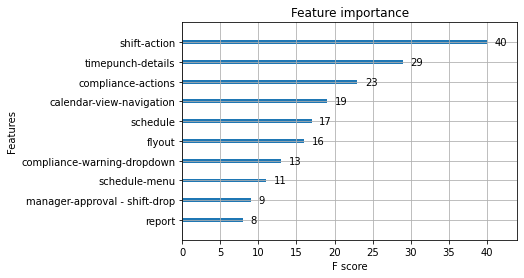

In [57]:
from xgboost import plot_importance #显示特征重要性
xgbc_fit = xgbc.fit(x_dropped, if_aos)
plot_importance(xgbc_fit,max_num_features=10)
plt.show()

**预期得出结论**： aos对以上这些action有一定的影响作用

***后续工作***：做一些描述性统计性的工作用于辅助说明，比如说使用aos和未使用aos的store各自的shift-action有多少，平均是多少